In [1]:
import yfinance as yf
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

# Stock market To-do's 
- portfolio list 
- profit calculator 
- chart maker function
- For day trading chart lose must be red win must be blue

In [2]:
#Stock List
bist = ["AEFES.IS", "AGHOL.IS", "AHGAZ.IS", "AKBNK.IS", "AKCNS.IS", "AKFGY.IS", "AKFYE.IS", "AKSA.IS",  "AKSEN.IS", "ALARK.IS", "ALBRK.IS", "ALFAS.IS", "ARCLK.IS", "ASELS.IS", "ASTOR.IS", "BERA.IS",
        "BIENY.IS", "BIMAS.IS", "BRSAN.IS", "BRYAT.IS", "BUCIM.IS", "CANTE.IS", "CCOLA.IS", "CIMSA.IS", "CWENE.IS", "DOAS.IS",  "DOHOL.IS", "ECILC.IS", "ECZYT.IS", "EGEEN.IS", "ENJSA.IS", "ENKAI.IS",
        "EREGL.IS", "EUPWR.IS", "EUREN.IS", "FROTO.IS", "GARAN.IS", "GENIL.IS", "GESAN.IS", "GLYHO.IS", "GUBRF.IS", "GWIND.IS", "HALKB.IS", "HEKTS.IS", "IMASM.IS", "IPEKE.IS", "ISCTR.IS", "ISDMR.IS",
        "ISMEN.IS", "IZMDC.IS", "KARSN.IS", "KAYSE.IS", "KCAER.IS", "KCHOL.IS", "KMPUR.IS", "KONTR.IS", "KONYA.IS", "KORDS.IS", "KOZAA.IS", "KOZAL.IS", "KRDMD.IS", "KZBGY.IS", "MAVI.IS",  "MGROS.IS", 
        "MIATK.IS",  "ODAS.IS", "OTKAR.IS", "OYAKC.IS", "PENTA.IS", "PETKM.IS", "PGSUS.IS", "QUAGR.IS", "SAHOL.IS", "SASA.IS",  "SISE.IS",  "SKBNK.IS", "SMRTG.IS", "SOKM.IS",  "TAVHL.IS", "TCELL.IS", 
        "THYAO.IS", "TKFEN.IS", "TOASO.IS", "TSKB.IS",  "TTKOM.IS", "TTRAK.IS", "TUKAS.IS", "TUPRS.IS", "ULKER.IS", "VAKBN.IS", "VESBE.IS", "VESTL.IS", "YEOTK.IS", "YKBNK.IS", "YYLGD.IS", "ZOREN.IS"]
len(bist)

96

In [3]:
stock_data = []
for stocks in bist:
    ticker = yf.Ticker(stocks)
    stock_info = ticker.info
    data = {key: stock_info.get(key, None) for key in ["symbol", "priceToBook", "currentPrice", "targetHighPrice", "targetLowPrice", "targetMeanPrice","targetMedianPrice",
                                                        "bookValue", "fiftyTwoWeekLow", "fiftyTwoWeekHigh", "open", "dayLow", "dayHigh", "recommendationKey"]}
    stock_data.append(data)
    df = pd.DataFrame(stock_data)


In [4]:
    
df["change"]        =           ((df["currentPrice"]/df["open"])-1)*100
df['How Far Median'] =          ((df["targetMedianPrice"]/df["currentPrice"])-1)*100
df["How Far targetHighPrice"] = ((df["targetHighPrice"]/df["currentPrice"])-1)*100
df["How Far targetLowPrice"]  = ((df["currentPrice"]/df["targetLowPrice"])-1)*100
df["How Far targetMeanPrice"] = ((df["currentPrice"]/df["targetMeanPrice"])-1)*100
df["Potantial"]     =           ((df["targetHighPrice"]-df["targetMeanPrice"])/df["currentPrice"])*100

In [5]:
df1 = df.drop(["open",],axis=1)
df2 = df1[["symbol",'priceToBook',"currentPrice","Potantial",'How Far Median' ,'targetHighPrice','targetLowPrice', 'targetMeanPrice', 'targetMedianPrice',"change","recommendationKey"]]
buy = df2.sort_values(by="How Far Median",ascending=False)
buy = buy[buy["recommendationKey"]=="buy"]
buy.head(15)
#gwind'i sil

,symbol,priceToBook,currentPrice,Potantial,How Far Median,targetHighPrice,targetLowPrice,targetMeanPrice,targetMedianPrice,change,recommendationKey
4,AKCNS.IS,1.978632,142.60,22.889201,56.942496,244.60,155.64,211.96,223.80,-2.728513,buy
41,GWIND.IS,2.308047,30.06,0.000000,51.663340,45.59,45.59,45.59,45.59,-0.463576,buy
77,SOKM.IS,1.796407,65.40,47.798165,38.379205,123.00,70.89,91.74,90.50,-1.431801,buy
91,VESTL.IS,0.842268,90.50,0.000000,36.861878,123.86,123.86,123.86,123.86,-1.523395,buy
90,VESBE.IS,1.657033,22.36,21.332737,36.627907,34.33,23.81,29.56,30.55,-2.015776,buy
23,CIMSA.IS,1.760304,34.34,15.113570,29.295282,50.50,41.94,45.31,44.40,1.238208,buy
80,THYAO.IS,27.451910,318.25,31.996858,23.173606,491.03,274.00,389.20,392.00,0.000000,buy
74,SISE.IS,1.134221,53.55,24.220355,22.502334,78.70,53.00,65.73,65.60,-1.562500,buy
9,ALARK.IS,1.263264,120.60,28.714760,22.305141,183.44,116.78,148.81,147.50,1.259446,buy
7,AKSA.IS,2.360225,122.00,5.704918,21.631148,155.35,141.44,148.39,148.39,-0.813008,buy


In [6]:
df1["How Far targetLowPrice"]
sell = df1.sort_values(by="How Far targetLowPrice",ascending=True)
sell = sell[["symbol",'priceToBook',"currentPrice","How Far targetLowPrice",'targetHighPrice','targetLowPrice', 'targetMeanPrice', 'targetMedianPrice',"change","recommendationKey" ]]
sell = sell[sell["recommendationKey"]=="hold"]
sell

,symbol,priceToBook,currentPrice,How Far targetLowPrice,targetHighPrice,targetLowPrice,targetMeanPrice,targetMedianPrice,change,recommendationKey
31,ENKAI.IS,0.976716,39.64,-2.316412,50.89,40.58,44.77,43.48,-1.978239,hold
57,KORDS.IS,1.556939,102.80,-0.194175,113.09,103.00,109.62,112.76,-0.676329,hold
58,KOZAA.IS,2.516071,50.10,6.618429,85.00,46.99,66.00,66.00,-0.988142,hold
32,EREGL.IS,0.798668,49.42,26.880616,65.00,38.95,51.35,51.11,1.938944,hold
30,ENJSA.IS,1.410553,69.00,27.777778,97.45,54.00,67.51,62.30,-0.144718,hold
81,TKFEN.IS,0.924457,54.20,42.819499,58.23,37.95,50.02,49.80,-1.900452,hold
95,ZOREN.IS,0.786458,6.04,44.497608,4.18,4.18,4.18,4.18,0.332226,hold
69,PETKM.IS,1.052632,21.24,53.913043,30.00,13.80,23.69,25.31,-0.840336,hold
89,VAKBN.IS,1.160714,22.10,70.000000,31.36,13.00,19.44,19.00,0.821168,hold
25,DOAS.IS,1.604140,310.00,74.157303,405.00,178.00,312.43,323.00,-0.401606,hold


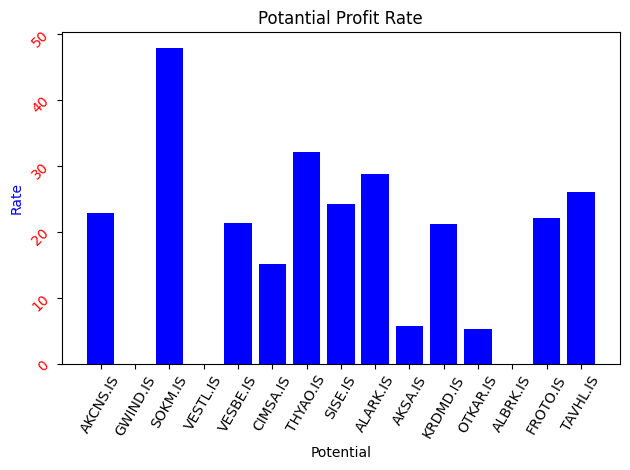

In [7]:
fig, ax1 = plt.subplots()

top_10 = buy.head(15)
ax1.set_xlabel("Potential")
ax1.set_ylabel('Rate', color="blue")
ax1.bar(top_10["symbol"], top_10.Potantial, color="blue") 
ax1.tick_params(axis='y', labelcolor="red",labelrotation = 45)
plt.xticks(rotation=60)

plt.title("Potantial Profit Rate")
fig.tight_layout()  
plt.show()

In [8]:
my_portfolio = [] # this is my portfolio link
# portfolio bought price & how much earned chart will create